In [30]:
!pip install mlxtend

In [31]:
from mlxtend.data  import  loadlocal_mnist
import platform
import numpy as np 
import pandas as pd
import matplotlib.pyplot as  plt 
import  seaborn as  sns
import numpy as np


In [32]:
import gzip

In [33]:
## 2 PCA
X,y = loadlocal_mnist(images_path="train-images.idx3-ubyte",labels_path="train-labels.idx1-ubyte")

In [34]:
np.savetxt(fname='images.csv', X=X,  delimiter=',',  fmt='%d')
np.savetxt(fname='labels.csv',X=y,  delimiter=',',  fmt='%d')
df_img =  pd.read_csv('images.csv')
df_img.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_label = pd.read_csv('labels.csv')
df_label.rename(columns={'5':  'label'},inplace = True)
df_label.head(10)

,label
0,0
1,4
2,1
3,9
4,2
5,1
6,3
7,1
8,4
9,3


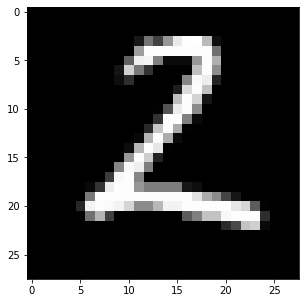

2


In [36]:
label = df_label["label"]
ind= np.random.randint(0,20000)
plt.figure(figsize=(20,5))
grid_data =  np.array(df_img.iloc[ind]).reshape(28,28)
plt.imshow(grid_data,  interpolation = None,  cmap =  'gray') 
plt.show()
print(label[ind])

In [37]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
std_df=  scaler.fit_transform(df_img)
std_df.shape



(59999, 784)

In [38]:
covar_mat=  np.matmul(std_df.T,  std_df)
covar_mat.shape


(784, 784)

In [39]:
from scipy.linalg import eigh
values,  vectors= eigh(covar_mat,  eigvals=(782,783))
print("Dimensions of  Eigen vector:",  vectors.shape)
vectors= vectors.T
print("Dimensions of Eigen vector:",  vectors.shape)

final_df= np.matmul(vectors,  std_df.T)
print("vectros:",  vectors.shape,  "n",  "std_df:",  std_df.T.shape,  "n",  "final_df:",final_df.T.shape)

final_dfT=  np.vstack((final_df,  label)).T
dataFrame=  pd.DataFrame(final_dfT,  columns=['pca_1',   'pca_2',   'label'])
dataFrame




Dimensions of  Eigen vector: (784, 2)
Dimensions of Eigen vector: (2, 784)
vectros: (2, 784) n std_df: (784, 59999) n final_df: (59999, 2)


,pca_1,pca_2,label
0,-7.754260,8.709034,0.0
1,9.430746,2.328239,4.0
2,-3.746570,-6.582143,1.0
3,3.132793,-5.183344,9.0
4,-3.068530,2.198356,2.0
...,...,...,...
59994,-5.119189,-2.039212,8.0
59995,-6.498161,0.607974,3.0
59996,-3.230515,-3.776853,5.0
59997,-4.948296,1.722299,6.0


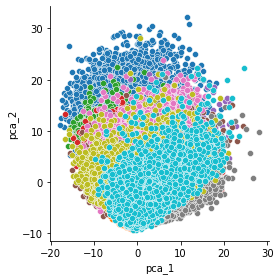

In [41]:
sns.FacetGrid(dataFrame,  hue=  'label',height=4).map(sns.scatterplot,   'pca_1','pca_2')
plt.show()


In [42]:
#problem 2 PCA (A)

In [43]:
train_df=  pd.read_csv("train.csv")
train_df.head()
a=train_df['label']
b=train_df.drop(columns='label')

mean =  train_df.groupby(['label']).mean()
print('MEAN')
print((mean))



MEAN
       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
label                                                                           
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel9  ...  pi

In [44]:
std =  train_df.groupby(['label']).std()
print('Standard deviation')
print((std))

Standard deviation
       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
label                                                                           
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       p

In [45]:
x=  train_df.drop(['label'],  axis=1)# DISPLAYING  THE IMAGES WITH IMAGES WITH MEAN OF EACH PI
y= train_df['label']
from sklearn.decomposition  import  PCA
pca =  PCA(n_components=2)# 10 Dimensions 
principalCom=  pca.fit_transform(x)
principalDf=  pd.DataFrame(data=  principalCom, columns=['pca_1',   'pca_2'])
df2=  pd.concat([principalDf,  train_df[['label']]],  axis=1)


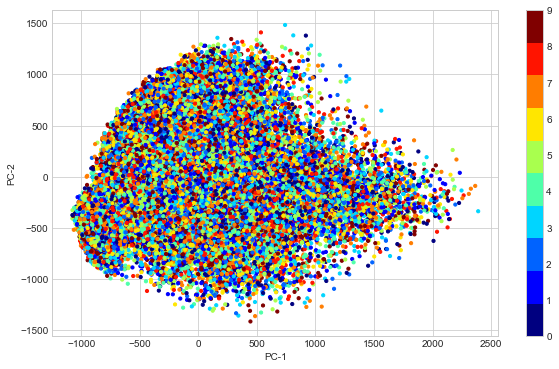

In [54]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,6))
c_map= plt.cm.get_cmap('jet',10)
plt.scatter(principalCom[:,0],  principalCom[:,1],  s=10,cmap= c_map, c= df2['label'][::-1])
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2') 
plt.show()

In [55]:
import numpy as np
import matplotlib.pyplot as  plt


def image2vec(image):
    return  image.flatten()


def vec2image(vec):
    return vec.reshape(28, 28)

images1=b
labels1=a

def read_mnist(normalize=True):
    labels=labels1
    images=images1
    #labels = np.load('t10k-labels.idx1-ubyte',allow_pickle=True).astype(int) 
    #images =  np.load('t10k-images.idx3-ubyte',allow_pickle=True).astype(float) 
    print(labels)
    print(images)
    if normalize:
        images=  images/255# rescale to be between 0 and 1
    return  images,  labels


class MnistPlotter:
    

# plot params  to make figures nice
    size=28
    cmap='Greys'
    dpi=96
    lw= dpi/(1024*32)

def draw_image(self,  image,  label=None):
# params
    figsize=(6,6)

# pLot
    fig = plt.figure(figsize=figsize,  dpi=self.dpi) 
    ax1 = fig.add_subplot(111)
    self._draw_single_image(ax1,  image,  label)

    return fig
def draw_two_images(self,  im1,  im2): 
# params
    figsize=(12,6)

# plot
    fig= plt.figure(figsize=figsize,  dpi=self.dpi)
    ax1= fig.add_subplot(121)
    ax2= fig.add_subplot(122)
    for ax,  image in  zip([ax1,  ax2],[im1,  im2]):
        self._draw_single_image(ax,  image)

    return fig

def draw_three_images(self,  im1,  im2,  im3, **kwargs):

# params
 


    figsize=(18,6)

# pLot
    fig= plt.figure(figsize=figsize,  dpi=self.dpi)
    ax1= fig.add_subplot(131)
    ax2= fig.add_subplot(132)
    ax3= fig.add_subplot(133)

    for ax,  image in  zip([ax1,  ax2,  ax3],[im1,  im2,  im3]):
        self._draw_single_image(ax,  image,**kwargs)

    return fig

def _draw_single_image(self,  ax,  image,  label=None,  fs=50, **kwargs):

# defauLt kwargs
    default_kwargs = dict(vmin=0,  vmax=1,  edgecolor='k',  lw=self.lw) 
    default_kwargs.update(kwargs)

# params
    lw_border=6
    lim=[0,  self.size]

# pLot image
    cmap= plt.get_cmap(self.cmap)
    ax.pcolormesh(image,  cmap=cmap,**default_kwargs)

# draw boundaries
    for v in [0,  self.size]:
        ax.plot([v,  v],  lim,  lw=lw_border,  color='k') 
        ax.plot(lim, [v,  v],  lw=lw_border,  color='k')

# handLe axis
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    ax.invert_yaxis()
    ax.set_aspect('equal') 
    ax.set_axis_off()

# draw LabeL
#if label is not None:
#ax.text(0.03, 0.84,  ctr(label),  fontsize=fs,  color='k',  transform=ax.


In [56]:
from  sklearn.metrics  import  r2_score
from  sklearn.metrics  import  mean_squared_error 
from  math  import  sqrt
import numpy as np

#where X is the originaL  data and f is  the compressed data.
X=  dataFrame.head(59999)
f=  final_dfT
r2=  r2_score(X,f)
rmse=  sqrt(mean_squared_error(X,f))

In [57]:
pca =  PCA()
pca.fit(x)

PCA()

In [58]:
pca.n_components_

784

In [59]:
tot=  sum(pca.explained_variance_)
tot


3434021.245772519

In [60]:
var_exp = [(i/tot)*100 for i in  sorted(pca.explained_variance_,  reverse=True)]
print(var_exp[0:5])


[9.748937689497492, 7.1602662750273005, 6.145903355957332, 5.379301996327382, 4.894262134042025]


In [61]:
tot=  sum(pca.explained_variance_)
tot


3434021.245772519

In [62]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_,  reverse=True)]
print(var_exp[0:5])


[9.748937689497492, 7.1602662750273005, 6.145903355957332, 5.379301996327382, 4.894262134042025]


In [63]:
cum_var_exp =  np.cumsum(var_exp)

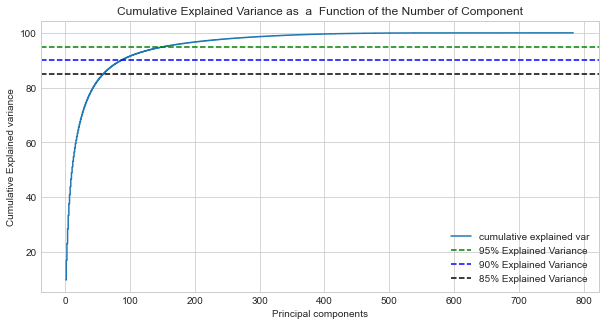

In [64]:
plt.figure(figsize=(10, 5))
plt.step(range(1, 785),  cum_var_exp,  where='mid',label='cumulative explained var')
plt.title('Cumulative Explained Variance as  a  Function of the Number of Component')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y=95,  color='g',  linestyle='--',  label=  '95% Explained Variance')
plt.axhline(y=90,  color='b',  linestyle='--',  label=  '90% Explained Variance')
plt.axhline(y=85,  color='k',  linestyle='--',  label=  '85% Explained Variance')
plt.legend(loc='best') 
plt.show()

